#### Question 1

**Prove:**

$\tilde{R}_l \approx \overline{V}^\alpha \bigl[\sum_{0\lt t' \leq l}G(t')c(t'-l) + \sum_{l\lt t'}G(t')c(t'-l) - \sum_{0\lt t'}G(t')c(t')\bigr]$

**Given equations:**

$R_l = \langle (p_{t+l} - p_{t}) \epsilon_t \rangle_{\text{over } t}$

$p_t = \sum_{t'\lt t} [G(t-t') V^\alpha_{t'} \epsilon_{t'}] + \varepsilon_t$

$C(l) \equiv \langle \epsilon_{t}\epsilon_{t+l}V^\alpha_{t+l} \rangle_{\text{over } t}$

$C(l) \approx \overline{V}^\alpha c(l) \text{ where } c(l) \equiv \langle \epsilon_{t}\epsilon_{t+l} \rangle_{\text{over } t}$

**Proof:**

$$\begin{aligned}
    p_t &= \sum_{t'\lt t} [G(t-t') V^\alpha_{t'} \epsilon_{t'}] \\
    R_l &= \langle (p_{t+l} - p_{t}) \epsilon_t \rangle_{\text{over } t} \\
    &\approx \bigl\langle \bigl(\sum_{t'\lt t+l} [G(t+l-t') V^\alpha_{t'} \epsilon_{t'}\bigr] + \varepsilon_{t+l} - \sum_{t'\lt t} [G(t-t') V^\alpha_{t'} \epsilon_{t'}] - \varepsilon_t \bigr) \epsilon_t \bigr\rangle \\
    &= \overline{V}^\alpha\bigl\langle \sum_{t'\lt t+l} [G(t+l-t') \epsilon_{t'}\epsilon_t] - \sum_{t'\lt t} [G(t-t') \epsilon_{t'} \epsilon_t] + (\varepsilon_{t+l} - \varepsilon_t)\epsilon_t \bigr\rangle \\
    &= \overline{V}^\alpha\bigl\langle \sum_{t'\lt t+l} [G(t+l-t') \epsilon_{t'}\epsilon_t] - \sum_{t'\lt t} [G(t-t') \epsilon_{t'} \epsilon_t] \bigr\rangle + \underbrace{\bigl\langle (\varepsilon_{t+l} - \varepsilon_t)\epsilon_t \bigr\rangle}_{\text{Normally distributed around 0}} \\
    &= \overline{V}^\alpha\bigl\langle \sum_{-(t+l) \lt t'\lt 0} [G(-t') \epsilon_{t+t'+l}\epsilon_t] - \sum_{-t \lt t'\lt 0} [G(-t') \epsilon_{t+t'} \epsilon_t] \bigr\rangle \\
&= \overline{V}^\alpha\bigl\langle \sum_{-(t+l) \lt t'\lt 0} [G(-t') c(t'+l)] - \sum_{-t \lt t'\lt 0} [G(-t') c(t')] \bigr\rangle \\
    &= \overline{V}^\alpha\bigl\langle \sum_{0 \lt t'\lt t+l} [G(t') \underbrace{c(t'-l)}_{=c(-t'+l)}] - \sum_{0 \lt t'\lt t} [G(t') \underbrace{c(t')}_{=c(-t')}] \bigr\rangle \\
    &= \overline{V}^\alpha\bigl\langle \sum_{0 \lt t'\lt l} [G(t') c(t'-l)] + \sum_{l \lt t'} [G(t') c(t'-l)] - \sum_{0 \lt t'} [G(t') c(t')] \bigr\rangle
\end{aligned}$$

In [1]:
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)
import statsmodels.api as sm

dlpp1607 = pd.read_csv("pp1_md_201607_201607.csv").drop("Unnamed: 0", axis=1)
dlpp1608 = pd.read_csv("pp1_md_201608_201608.csv").drop("Unnamed: 0", axis=1)

dlpp = pd.concat([dlpp1607, dlpp1608])
dlpp.dropna(inplace=True)
dlpp = dlpp[(dlpp["BP1"]!=0) & (dlpp["SP1"]!=0)]
dlpp.reset_index(inplace=True)
display(dlpp)

,index,Date,Time,Size,VWAP,Sign,midQ,BP1,SP1
0,0,20160701,90100020,48.0000,"5,267.9167",-1.0000,"5,268.0000","5,266.0000","5,270.0000"
1,1,20160701,90100270,42.0000,"5,266.5714",-1.0000,"5,268.0000","5,266.0000","5,270.0000"
2,2,20160701,90100518,72.0000,"5,268.4444",1.0000,"5,267.0000","5,266.0000","5,268.0000"
3,3,20160701,90100762,326.0000,"5,270.0000",1.0000,"5,268.0000","5,266.0000","5,270.0000"
4,4,20160701,90101019,6.0000,"5,268.6667",-1.0000,"5,270.0000","5,268.0000","5,272.0000"
...,...,...,...,...,...,...,...,...,...
900986,506305,20160831,145858297,22.0000,"5,347.8182",1.0000,"5,347.0000","5,346.0000","5,348.0000"
900987,506306,20160831,145858815,44.0000,"5,346.0000",-1.0000,"5,347.0000","5,346.0000","5,348.0000"
900988,506307,20160831,145859065,38.0000,"5,347.2632",1.0000,"5,347.0000","5,346.0000","5,348.0000"
900989,506308,20160831,145859324,4.0000,"5,346.0000",-1.0000,"5,347.0000","5,346.0000","5,348.0000"


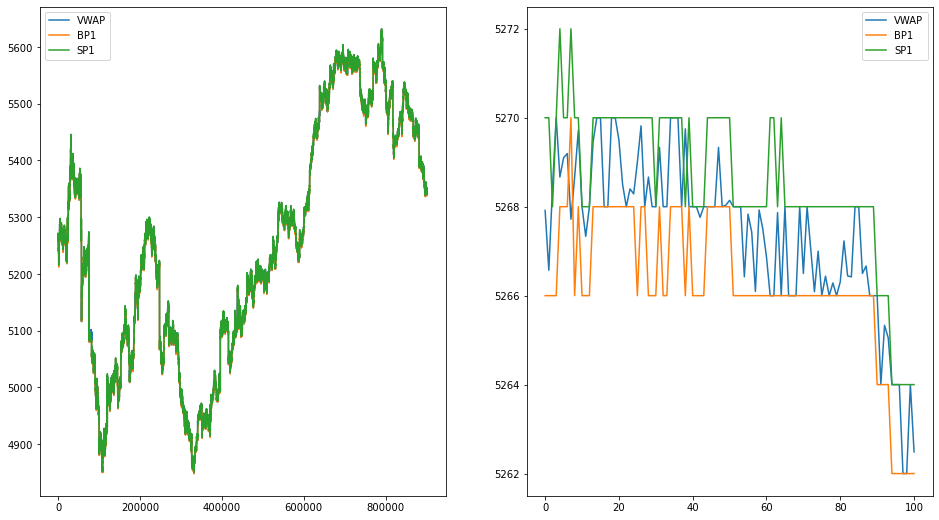

In [2]:
fig, axs = plt.subplots(1,2)

dlpp.loc[:,["VWAP", "BP1", "SP1"]].plot(ax = axs[0])
dlpp.loc[:100,["VWAP", "BP1", "SP1"]].plot(ax = axs[1])

plt.show()

#### Question 2

Construct $\tilde{R}_l$ for $0\leq l \leq500$ as defined in $\tilde{R}_l = \langle (\hat{p}_{t+l} - m_t) \epsilon_t \rangle_{\text{over } t}$

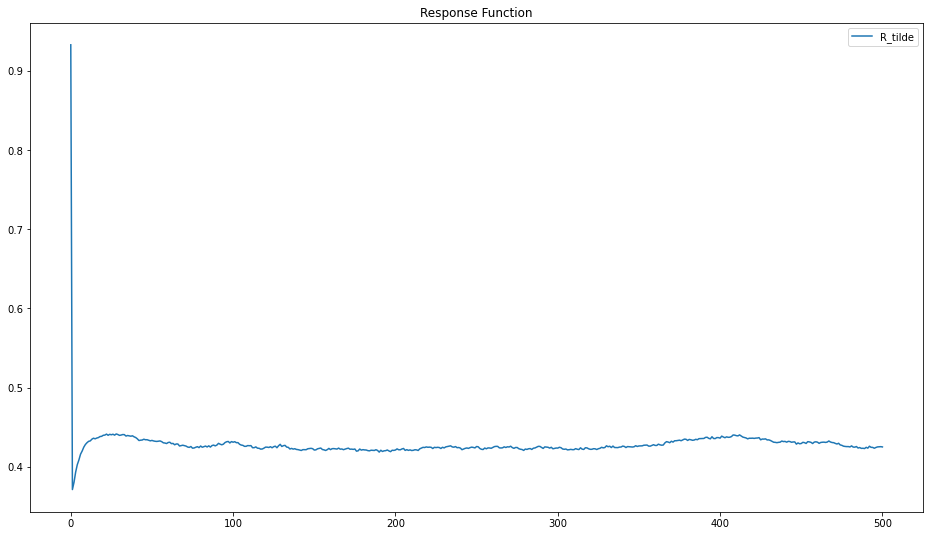

In [3]:
def r_tilde(vwap, mid, sign, l):
    return np.mean((vwap[l:].values - mid[:-l].values) * sign[:-l].values)

vwap = dlpp["VWAP"]
mid  = dlpp["midQ"]
sign = dlpp["Sign"]

r_list = []
r_list.append(np.mean((vwap - mid) * sign))
for l in range(1, 501):
    r_list.append(r_tilde(vwap, mid, sign, l))

r_df = pd.DataFrame(r_list, columns=["R_tilde"])
r_df.plot(title="Response Function")
plt.show()

#### Question 3

Construct $\tilde{R}_l|_{V_i}$ for $0\leq l \leq500$ and $v_i \lt V_i \leq v_{i+1} \text{ with } v_i \in [0,2,5,10,15,20,30,40,55,90,100000]$.

Comment on the findings, especially on how the response function depends on trade sizes.

**Plots shown below**

The response function returns higher values when conditioned on larger trade sizes. From the plot titled `Conditional Response Function` we observe that the largest trade sizes (light blue) tend to have the highest response function values across lags while the smallest trade size tends to yield the lowest response (dark blue). However, there exists a certain degree of noise as a result of the discretized buckets of size; the response of trades size $\in (10,15]$ is at times higher than that of many larger trade sizes. This inconsistecy is clearly illustrated in the plot titled `Lower Bound of Size vs Mean of Response Function` as although increasing the conditional trade size tends to increase response, noise certainly exists, so the relationship is not perfect.

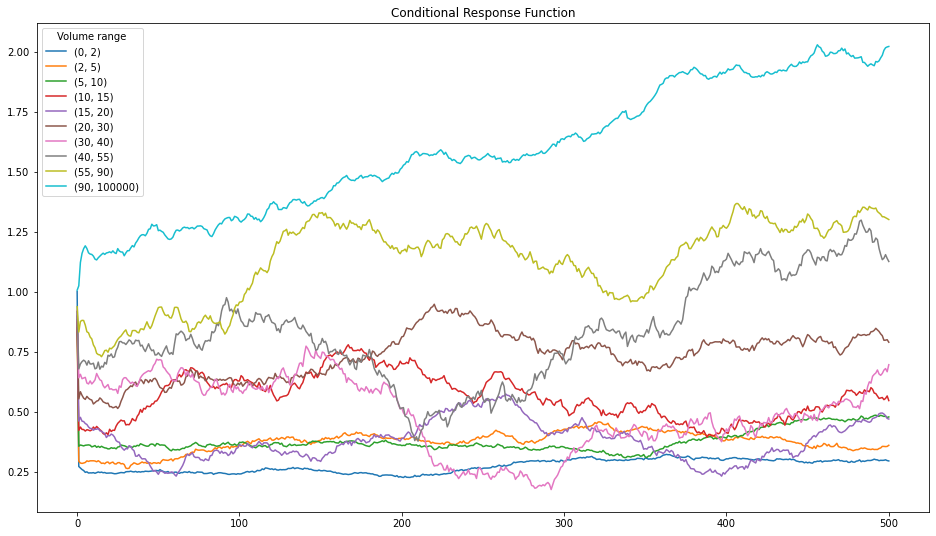

In [4]:
vs = [0,2,5,10,15,20,30,40,55,90,100000]
vs = zip(vs[:-1], vs[1:])

r_V_dict = {}
vis = []

for v in vs:
    dlpp_cond = dlpp[(v[0] < dlpp["Size"]) & (dlpp["Size"] <= v[1])]
    
    vwap = dlpp_cond["VWAP"]
    mid  = dlpp_cond["midQ"]
    sign = dlpp_cond["Sign"]
    
    r_list = []
    r_list.append(np.mean((vwap - mid) * sign))
    for l in range(1, 501):
        r_list.append(r_tilde(vwap, mid, sign, l))
    r_V_dict[v] = r_list
    vis.append(dlpp_cond["Size"].mean())

r_V_df = pd.DataFrame(r_V_dict)
r_V_df.plot(title="Conditional Response Function")
plt.legend(title="Volume range")
plt.show()

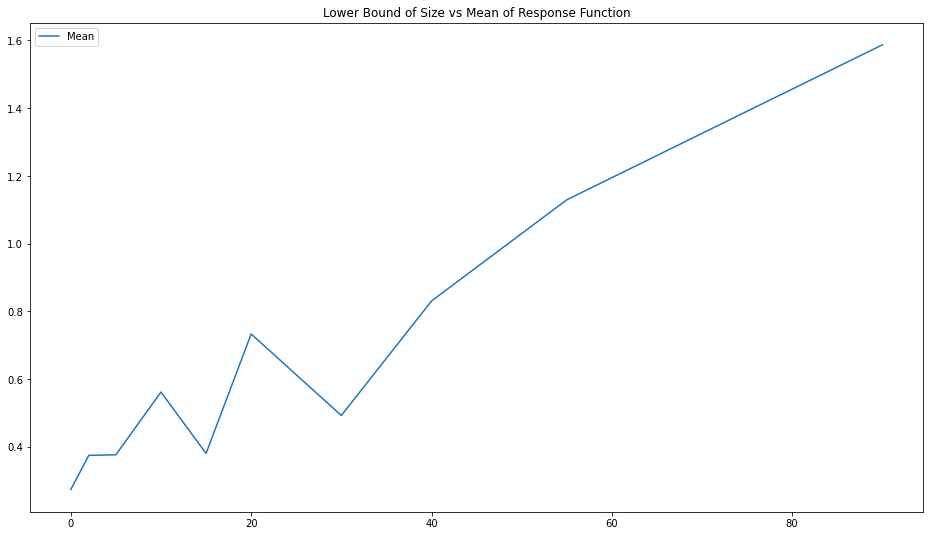

In [5]:
r_V_mu = r_V_df.mean().to_frame("Mean")
r_V_mu.index = [i[0] for i in r_V_mu.index]
r_V_mu.plot()
plt.title("Lower Bound of Size vs Mean of Response Function")
plt.show()

#### Question 4

Plot $X = \log(\langle V_i \rangle); Y = \log(\tilde{R}_l|_{V_i})$ for $l \in [10,20,30,40,50,75,100,125,150,175,200,250]$.

Compare the slopes of different straight lines for different l.

**Plots shown below**

The plot `Size vs Response Functions of Different Lags` does not reveal much about how the slopes compare with different size buckets. The plot is subject to significant noise and therefore it is visually difficult to compare. `Simplified Slopes` plots the average slopes between each size and it appears that lag has a positive relationship with the slope between size and response. `Regressions` reaffirms this observation, though the OLS slopes do not exhibit such an apparent positive trend. Notwithstanding outliers, it appears that empirically, lag is positively related with the response to size ratio. This implies that larger trade sizes elicit larger responses and have greater response effects with a longer look-ahead period. It is also worthy to note that with only 2 months of data, the relationship is susceptible to significant noise.

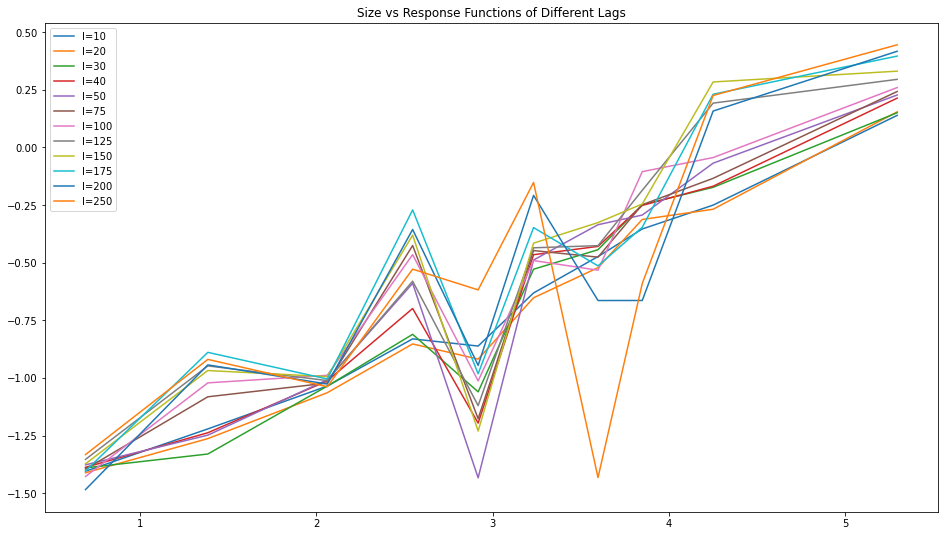

In [6]:
ls = [10,20,30,40,50,75,100,125,150,175,200,250]
lg_r = np.log(r_V_df)

x = np.log(vis)

for l in ls:
    y = lg_r.iloc[l,:]
    plt.plot(x, y, label=f"l={l}")
plt.title("Size vs Response Functions of Different Lags")
plt.legend()
plt.show()

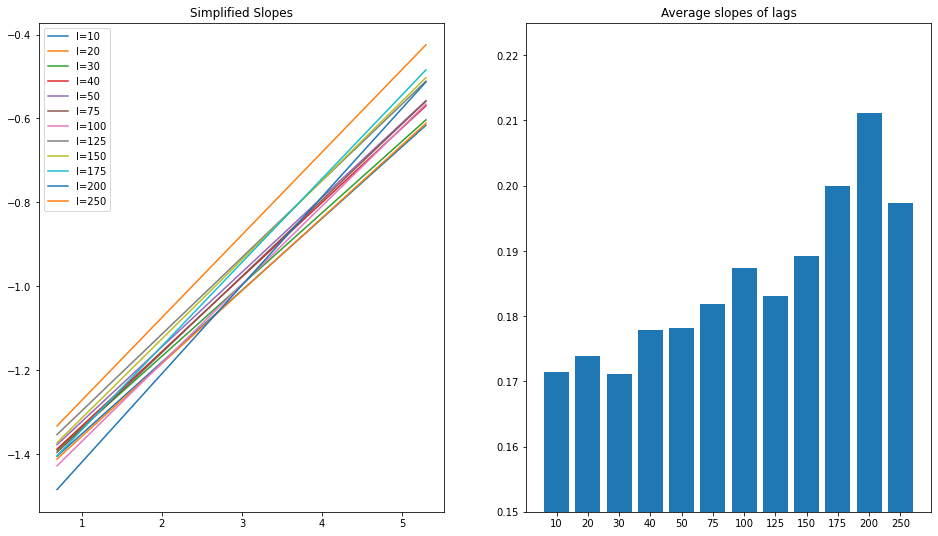

In [7]:
fig, axs = plt.subplots(1,2)

x = [x[0], x[-1]]
slopes = []

for l in ls:
    y = lg_r.iloc[l,:]
    y0 = y.iloc[0]
    slope = y.diff().mean()
    y = [y0, (y0+(slope*(x[-1]-x[0])))]
    axs[0].plot(x, y, label=f"l={l}")
    slopes.append(slope)
axs[0].set_title("Simplified Slopes")
axs[0].legend()

axs[1].bar([str(l) for l in ls],slopes)
axs[1].set_ylim([0.15, 0.225])
axs[1].set_title("Average slopes of lags")

plt.show()

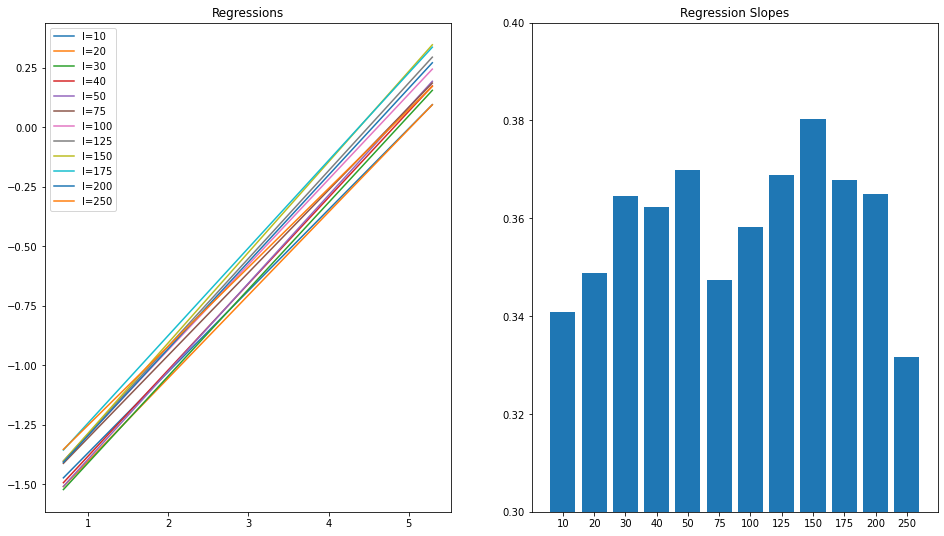

In [8]:
fig, axs = plt.subplots(1,2)

x = np.log(vis)
slopes = []

for l in ls:
    y = lg_r.iloc[l,:]
    res = sm.OLS(y, sm.add_constant(x)).fit()
    y_pred = res.predict(sm.add_constant(x))
    
    axs[0].plot(x, y_pred, label=f"l={l}")
    slopes.append(res.params[1])
axs[0].set_title("Regressions")
axs[0].legend()

axs[1].bar([str(l) for l in ls],slopes)
axs[1].set_ylim([0.3, 0.4])
axs[1].set_title("Regression Slopes")

plt.show()